In [1]:
from trafic import *
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

/home/noe/Projet_SA16/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
def position_voiture(route, i):
    return np.flatnonzero(route == i)[0]


def calculer_vmoy(route1, route2, taille, nb_voitures):
    deplacement = 0
    for i in range(1, nb_voitures+1):
        pos1 = position_voiture(route1, i)
        pos2 = position_voiture(route2, i)
        deplacement += (pos2-pos1)%taille
    return deplacement/nb_voitures


def calculer_distances(route, taille, nb_voitures):
    positions = [position_voiture(route, v) for v in np.arange(1, nb_voitures+1)]
    couples = list(zip(positions, np.roll(positions, -1)))
    return np.array([j-i + (taille if j < i else 0) for i, j in couples])


def calculer_embouteillage(route, taille, nb_voitures):
    return np.sum(1/calculer_distances(route, taille, nb_voitures)**2)

## Impact de la densité du trafic sur les embouteillages

In [3]:

taille = 100
p = [0, 0.1, 0.3, 0.5]
vmax = 5
nb_voitures = np.arange(1, taille+1)

vmoy = np.zeros((len(p), len(nb_voitures)))
emb = np.zeros((len(p), len(nb_voitures)))

for i in range(len(p)):
    modele = ModeleSimple(vmax, p[i])
    for j in range(len(nb_voitures)):
        route = route_equidistance(taille, nb_voitures[j])
        traj = modele.trajectoire(route, 100)
        vmoy[i][j] = calculer_vmoy(traj[-2], traj[-1], taille, nb_voitures[j])
        emb[i][j] = calculer_embouteillage(traj[-1], taille, nb_voitures[j])


/tmp/ipykernel_9415/322314706.py:21: RuntimeWarning: divide by zero encountered in divide
  return np.sum(1/calculer_distances(route, taille, nb_voitures)**2)


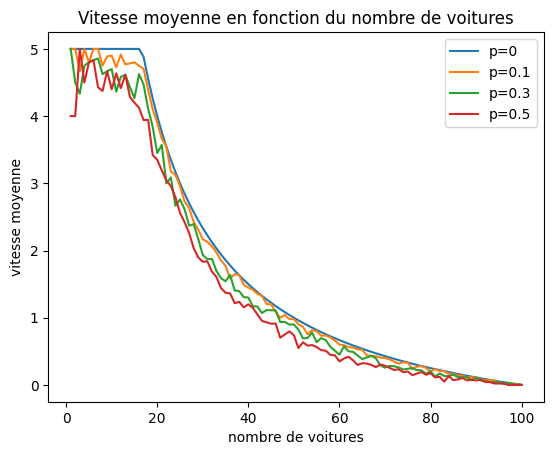

In [4]:
for i in range(len(p)):
    plt.plot(nb_voitures, vmoy[i], label=f'p={p[i]}')
plt.title("Vitesse moyenne en fonction du nombre de voitures")
plt.xlabel('nombre de voitures')
plt.ylabel('vitesse moyenne')
plt.legend()
plt.show()

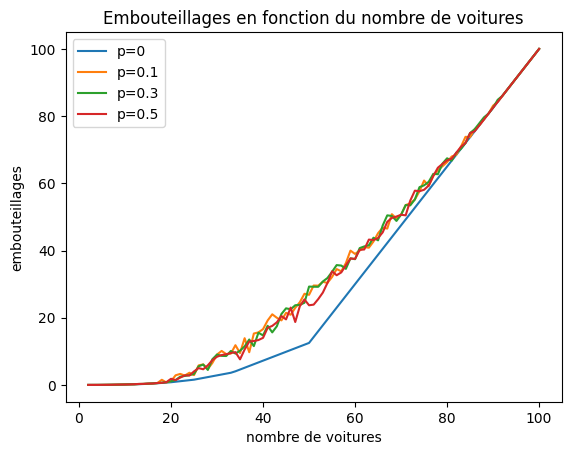

In [5]:
for i in range(len(p)):
    plt.plot(nb_voitures, emb[i], label=f'p={p[i]}')
plt.title("Embouteillages en fonction du nombre de voitures")
plt.xlabel('nombre de voitures')
plt.ylabel('embouteillages')
plt.legend()
plt.show()

## Impact de la limite de vitesse sur les embouteillages

In [6]:

taille = 100
p = [0, 0.1, 0.3, 0.5]
vmax = np.arange(10)
nb_voitures = 20

vmoy = np.zeros((len(p), len(vmax)))
emb = np.zeros((len(p), len(vmax)))

for i in range(len(p)):
    route = route_equidistance(taille, nb_voitures)
    for j in range(len(vmax)):
        modele = ModeleSimple(vmax[j], p[i])
        traj = modele.trajectoire(route, 100)
        vmoy[i][j] = calculer_vmoy(traj[-2], traj[-1], taille, nb_voitures)
        emb[i][j] = calculer_embouteillage(traj[-1], taille, nb_voitures)


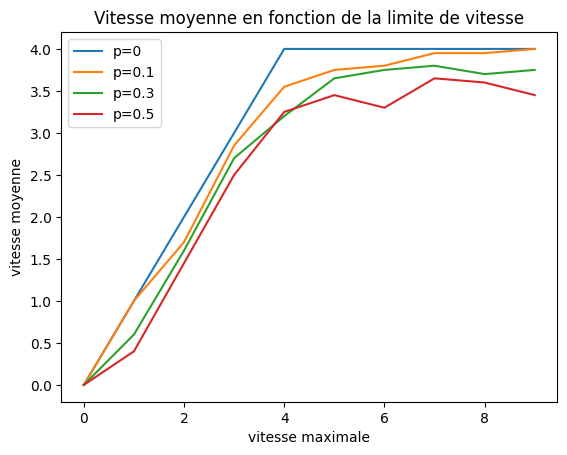

In [7]:
for i in range(len(p)):
    plt.plot(vmax, vmoy[i], label=f'p={p[i]}')
plt.title("Vitesse moyenne en fonction de la limite de vitesse")
plt.xlabel('vitesse maximale')
plt.ylabel('vitesse moyenne')
plt.legend()
plt.show()

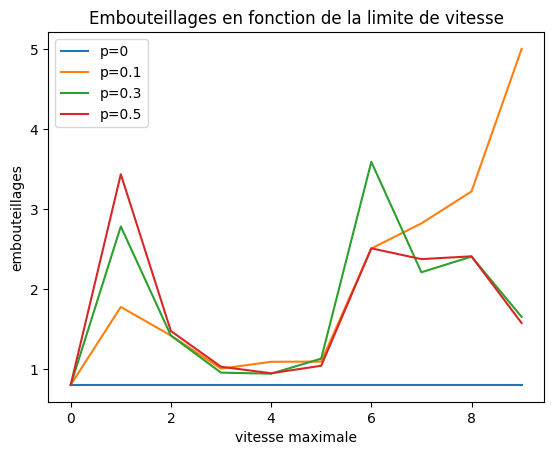

In [8]:
for i in range(len(p)):
    plt.plot(vmax, emb[i], label=f'p={p[i]}')
plt.title("Embouteillages en fonction de la limite de vitesse")
plt.xlabel('vitesse maximale')
plt.ylabel('embouteillages')
plt.legend()
plt.show()

## Apparition d'embouteillages

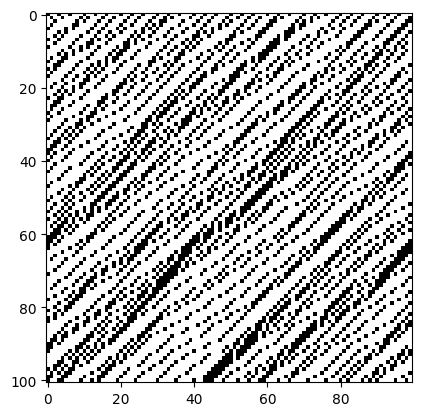

In [9]:
taille = 100
nb_voitures = 30
vmax = 5
p = 0.3
n = taille

route = route_equidistance(taille, nb_voitures)
modele = ModeleSimple(vmax, p)
traj = modele.trajectoire(route, n)
image = traj.copy()
image[image > 0] = 1
image = ~image
plt.imshow(image, cmap='gray')
plt.show()

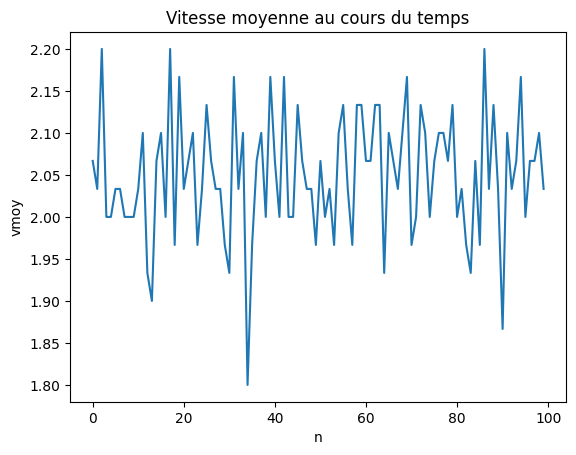

In [10]:
vmoy = [calculer_vmoy(r1, r2, taille, nb_voitures) for r1, r2 in zip(traj, traj[1:])]
plt.plot(vmoy)
plt.title("Vitesse moyenne au cours du temps")
plt.xlabel("n")
plt.ylabel("vmoy")
plt.show()

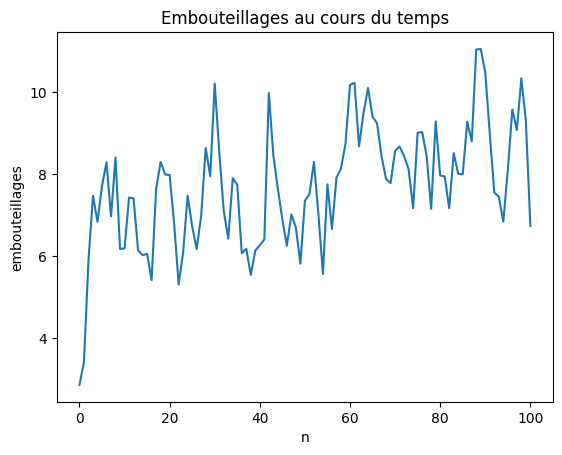

In [11]:
emb = [calculer_embouteillage(route, taille, nb_voitures) for route in traj]
plt.plot(emb)
plt.title("Embouteillages au cours du temps")
plt.xlabel("n")
plt.ylabel("embouteillages")
plt.show()

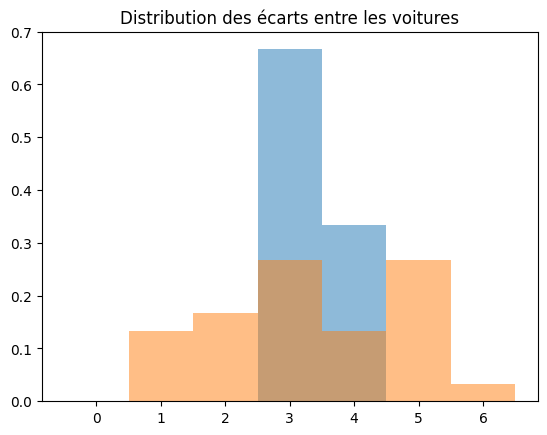

In [12]:
dist1 = calculer_distances(traj[0], taille, nb_voitures)
dist2 = calculer_distances(traj[-1], taille, nb_voitures)
plt.hist(dist1, density=True, bins=np.arange(-0.5, np.max(dist1)+1.5), alpha=0.5, label="n=0")
plt.hist(dist2, density=True, bins=np.arange(-0.5, np.max(dist2)+1.5), alpha=0.5, label=f"n={len(traj)}")
plt.title("Distribution des écarts entre les voitures")
plt.show()